# <center> VAI Store - Análise Exploratória de Dados </center>

---

Nesse jupyter notebook iremos analisar os dados de produtos e vendas da VAI Store

## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
from pathlib import Path
import sys

sys.path.insert(0, str(Path.cwd().parent / 'src' / 'plots'))

## 2. Dataset

In [3]:
produtos = pd.read_csv('../data/raw/produto.csv', index_col = 0)

# Leitura dos dados
produtos.info()
produtos.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 3.0 to nan
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NOME_PRODUTO  6499 non-null   object
 1   CATEGORIA     4498 non-null   object
 2   SUBCATEGORIA  4498 non-null   object
dtypes: object(3)
memory usage: 203.1+ KB


,NOME_PRODUTO,CATEGORIA,SUBCATEGORIA
SKU,,,
3.0,COCO RALADO GROSSO KG ...,Doceria,Confeitaria
4.0,ICE TEA LEAO LATA 340ML ...,NaN,NaN
5.0,TAHINE ISTAMBUL 200G ...,Pelo Mundo,Pastas Árabes
6.0,AMENDOIM MOIDO KG ...,Castanhas & Oleaginosas,Oleaginosas moídas
7.0,HALAWI ISTAMBUL LATA 500G ...,Pelo Mundo,Pastas Árabes


Sumário das colunas:
* SKU = Código do produto 
* NOME_PRODUTO = Descrição do produto 
* CATEGORIA = Categoria do produto 
* SUBCATEGORIA = Subcategoria do produto

In [4]:
vendas = pd.read_csv('../data/raw/vendas.csv', index_col = 0)

# Leitura dos dados
vendas.info()
vendas.head()

<class 'pandas.core.frame.DataFrame'>
Index: 556198 entries, 000304564.299.0101042.20240102 to 000503479.257.0101032.20241231
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COD_VENDA    556198 non-null  object 
 1   COD_FILIAL   556198 non-null  int64  
 2   FILIAL       556198 non-null  object 
 3   DATA_ATEND   556198 non-null  object 
 4   SKU          556198 non-null  int64  
 5   UNID         556198 non-null  object 
 6   QTD_VENDA    556198 non-null  float64
 7   FATUR_VENDA  556198 non-null  float64
 8   CLI_CPF      556198 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 42.4+ MB


,COD_VENDA,COD_FILIAL,FILIAL,DATA_ATEND,SKU,UNID,QTD_VENDA,FATUR_VENDA,CLI_CPF
COD_ATEND,,,,,,,,,
000304564.299.0101042.20240102,000304564.299.0101042.20240102.000009.02,101042,SHOPPING,2024-01-02,9,KG,0.258,18.04,ec0abf3f4220
000374698.258.0101032.20240102,000374698.258.0101032.20240102.000009.10,101032,RUA,2024-01-02,9,KG,0.064,4.50,83d596ee0acf
000383551.256.0101032.20240102,000383551.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.164,11.49,46f63c18e055
000383533.256.0101032.20240102,000383533.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.202,14.13,6def1d35e2fe
000432095.257.0101032.20240102,000432095.257.0101032.20240102.000051.06,101032,RUA,2024-01-02,51,KG,0.086,6.87,1576e1a36394


Sumário das colunas:
* COD_ATEND = Código identificador do atendimento 
* COD_VENDA = Código identificador da venda 
* COD_FILIAL = Indica em qual loja foi feito o atendimento 
* FILIAL = Tipo de filial (Loja de Rua ou de Shopping) 
* DATA_ATEND = Data de atendimento daquele cliente a respeito daquele produto 
* SKU = Código do produto 
* UNID = Indica tipo do produto (granel ou prateleira) 
* QTD_VENDA = Quantidade vendida do produto 
* FATUR_VENDA  = Faturamento 
* CLI_CPF = Código do cliente

In [5]:
produtos.shape

(6500, 3)

## 3. Tratamento

### 3.1. Conversão de tipos de dados

In [6]:
# Conversão de COD_FILIAL e SKU para 'object'
vendas['COD_FILIAL'] = vendas['COD_FILIAL'].astype('object')
vendas['SKU'] = vendas['SKU'].astype('object')

# Conversão de DATA_ATEND para 'date'
vendas['DATA_ATEND'] = pd.to_datetime(vendas['DATA_ATEND'])

In [7]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556198 entries, 000304564.299.0101042.20240102 to 000503479.257.0101032.20241231
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   COD_VENDA    556198 non-null  object        
 1   COD_FILIAL   556198 non-null  object        
 2   FILIAL       556198 non-null  object        
 3   DATA_ATEND   556198 non-null  datetime64[ns]
 4   SKU          556198 non-null  object        
 5   UNID         556198 non-null  object        
 6   QTD_VENDA    556198 non-null  float64       
 7   FATUR_VENDA  556198 non-null  float64       
 8   CLI_CPF      556198 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 42.4+ MB


### 3.2. Tratamento de valores ausentes

In [8]:
vendas.isna().sum()

COD_VENDA      0
COD_FILIAL     0
FILIAL         0
DATA_ATEND     0
SKU            0
UNID           0
QTD_VENDA      0
FATUR_VENDA    0
CLI_CPF        0
dtype: int64

In [9]:
produtos.isna().sum()

NOME_PRODUTO       1
CATEGORIA       2002
SUBCATEGORIA    2002
dtype: int64

Observa-se que, no dataset de **produtos**, há a presença de valores nulos em todas as colunas. Sendo assim, vamos analisar caso a caso.

#### 3.2.1. CATEGORIA e SUBCATEGORIA

Para essas colunas categóricas, vamos substituir os valores ausentes por um novo tipo: **'Sem categoria'** e **'Sem subcategoria'**.

In [10]:
produtos['CATEGORIA'] = produtos['CATEGORIA'].fillna('Sem categoria')
produtos['SUBCATEGORIA'] = produtos['SUBCATEGORIA'].fillna('Sem subcategoria')

#### 3.2.2. NOME_PRODUTO

In [11]:
produtos[produtos['NOME_PRODUTO'].isna()]

,NOME_PRODUTO,CATEGORIA,SUBCATEGORIA
SKU,,,
NaN,NaN,Sem categoria,Sem subcategoria


Nesse caso, a linha é constituída apenas de valores nulos e, além disso, não há a possibilidade desse produto ter um relacionamento com alguma venda. Sendo assim, vamos simplesmente **remover** essa observação.

In [12]:
produtos.dropna(inplace=True)

In [13]:
# Quantidade de valores nulos pós tratamento
produtos.isna().sum()

NOME_PRODUTO    0
CATEGORIA       0
SUBCATEGORIA    0
dtype: int64

### 3.3. Limpeza de strings

Na coluna NOME_PRODUTO, os valores possuem espaços em branco após o último caracter. Por isso, vamos remover essas lacunas.

In [14]:
produtos['NOME_PRODUTO'] = produtos['NOME_PRODUTO'].str.strip()

In [15]:
# Nome dos produtos após tratamento
produtos['NOME_PRODUTO']

SKU
3.0                                     COCO RALADO GROSSO KG
4.0                                   ICE TEA LEAO LATA 340ML
5.0                                      TAHINE ISTAMBUL 200G
6.0                                         AMENDOIM MOIDO KG
7.0                                 HALAWI ISTAMBUL LATA 500G
                                  ...                        
171803.0     CREME DE LEITE DOCE ECILA 35% GARRAFA 450G 30261
171874.0                       BARRA BOLD BAR BANOFFEE 60G NV
171877.0    VINHO CASIL.D.CARNAVAL SPECTACULAR CARBENET 75...
171878.0    VINHO CASIL.D.CARNAVAL FANTASTIC SWEET 750ML C...
171887.0                BATATA PALHA EXTRA FINA VISCONTI 100G
Name: NOME_PRODUTO, Length: 6499, dtype: object

## 4. EDA

### 4.1. Análise do catálogo de produtos

Agora vamos entender quais as **principais categorias de produtos** vendidos pela VAI Store

In [43]:
# Importação das funções de plotagem
import plots_catalogo_produtos as pc
import importlib
importlib.reload(pc)

<module 'plots_catalogo_produtos' from 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\Grupo6-ProjetoFinal\\src\\plots\\plots_catalogo_produtos.py'>

Iniciando plot: Top 10 Categorias...
Total de produtos no catálogo: 6499
Total de produtos com categoria definida: 4498

Top 10 Categorias (%):
                CATEGORIA  PERCENTUAL
0             Suplementos    7.892397
1              Lanchonete    7.625611
2     Vinhos & Espumantes    6.291685
3              Guloseimas    5.246776
4                 Doceria    4.690974
5                   Natal    4.068475
6    Massas & Panificação    3.935082
7  Temperos & Condimentos    3.779458
8                   Frios    3.557137
9                 Bebidas    3.179191


c:\Users\felip\OneDrive\Documentos\GitHub\Grupo6-ProjetoFinal\src\plots\plots_catalogo_produtos.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


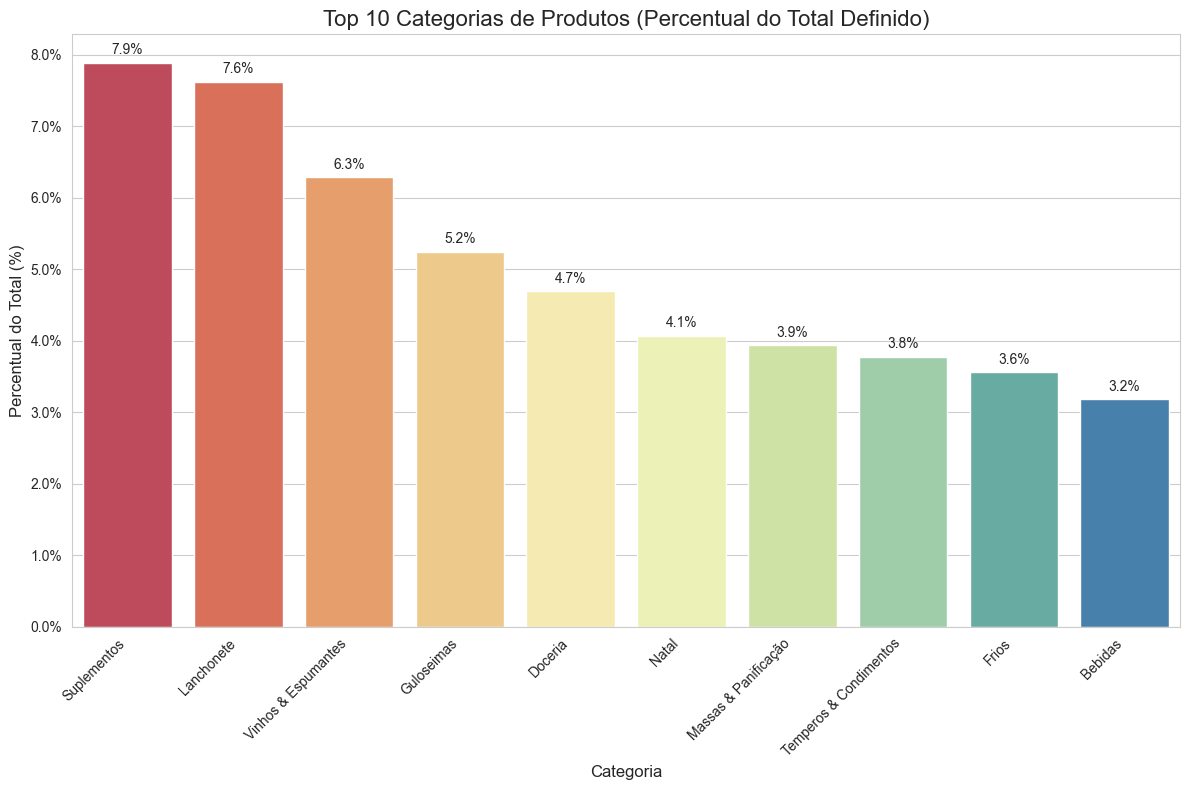


Gráfico salvo com sucesso em: ..\graphics\top_10_categorias.png


In [44]:
# Plotar o Top 10 Categorias
pc.plot_top_10_categorias(produtos)

Após conhecer as principais categorias de produtos vamos analisar as **principais subcategorias**

Iniciando plot: Top 10 Subcategorias...
Total de produtos no catálogo: 6499
Total de produtos com subcategoria definida: 4498

Top 10 Subcategorias (%):
        SUBCATEGORIA  PERCENTUAL
0        Suplementos    3.557137
1             Tintos    3.290351
2  Sucos e refrescos    3.001334
3             Cestas    2.712317
4       Ervas & Chás    2.578924
5          Barrinhas    2.423299
6            Queijos    2.245442
7            Cozinha    2.089818
8       Encapsulados    1.956425
9        Energéticos    1.823032


c:\Users\felip\OneDrive\Documentos\GitHub\Grupo6-ProjetoFinal\src\plots\plots_catalogo_produtos.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


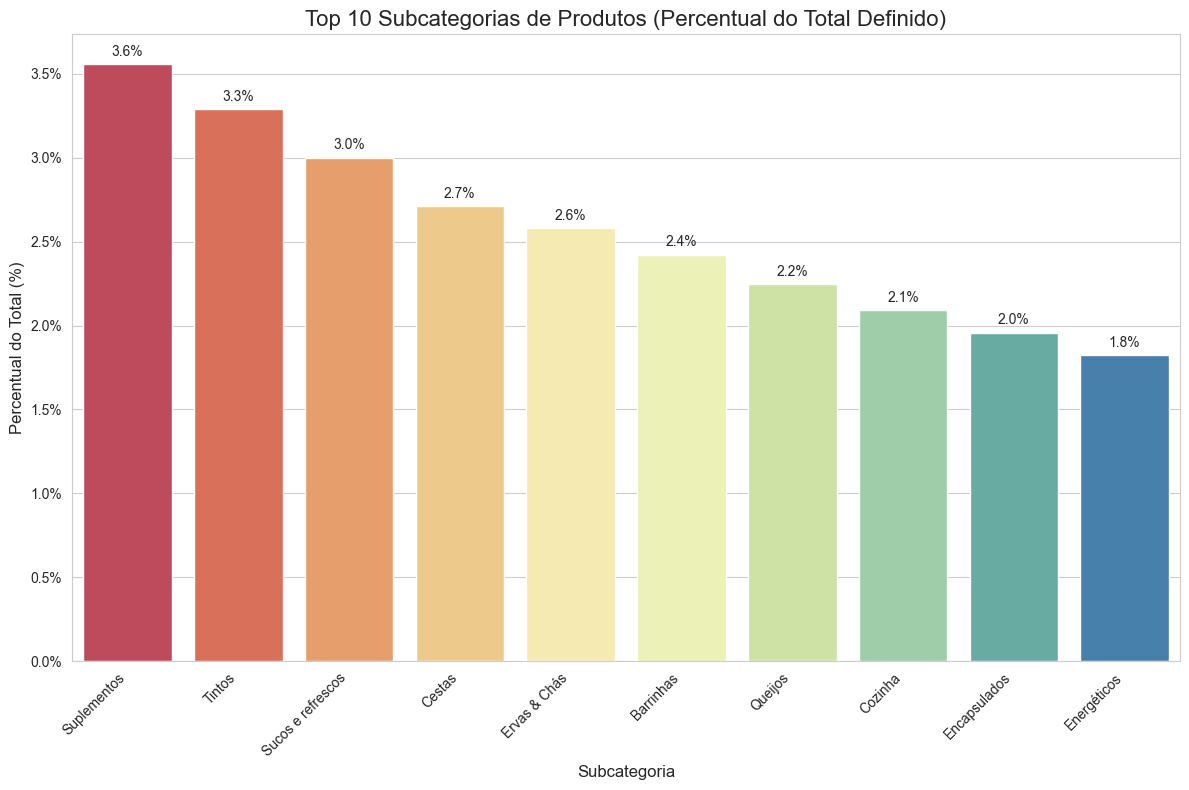


Gráfico salvo com sucesso em: ..\graphics\top_10_subcategorias.png


In [46]:
# Plotar o Top 10 Subcategorias
pc.plot_top_10_subcategorias(produtos)

Diante as informações acima podemos entender como o pool de produtos da VAI Store está estruturado atualmente

In [ ]:
# --- Plotar Gráficos de Vendas por Filial ---

# 1. Faturamento total (anual)
vf.plot_faturamento_total_filial(vendas)

# 2. Faturamento mensal agrupado
vf.plot_faturamento_mensal_filial(vendas)

# 3. Faturamento e Ticket Médio (combinado)
vf.plot_faturamento_e_ticket_medio_mensal(vendas)

# 4. Clientes únicos mensais
vf.plot_clientes_unicos_mensal_filial(vendas)

### 4.2. Análise do desempenho de vendas por filial

Agora vamos fazer a análise exploratória dos dados para as **vendas**. Podemos começar entendendo o faturamento de cada filial ao longo do ano

In [48]:
# Importação das funções de plotagem
import vendas_filial as vf
import importlib
importlib.reload(vf)

<module 'vendas_filial' from 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\Grupo6-ProjetoFinal\\src\\plots\\vendas_filial.py'>

Iniciando plot: Faturamento Total por Filial...

--- Faturamento Total Agrupado por Filial ---
     FILIAL  FATUR_VENDA
0       RUA   3801959.48
1  SHOPPING   4046767.45


c:\Users\felip\OneDrive\Documentos\GitHub\Grupo6-ProjetoFinal\src\plots\vendas_filial.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


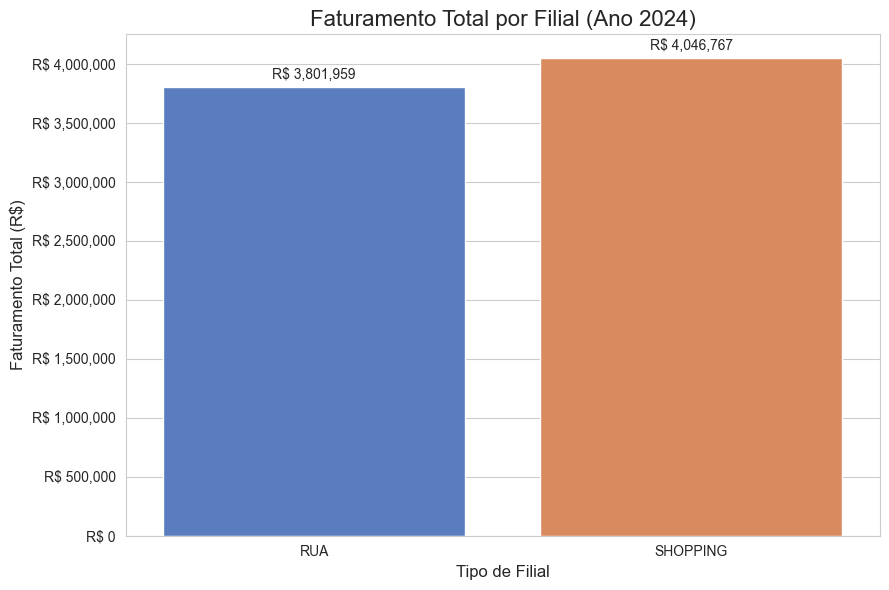


Gráfico salvo com sucesso em: ..\graphics\faturamento_anual_por_filial.png


In [49]:
vf.plot_faturamento_total_filial(vendas)

Fica perceptível que há uma diferença de faturamento entre as filiais, então vamos destrinchar essa receita um pouco mais

Iniciando plot: Faturamento Mensal por Filial...


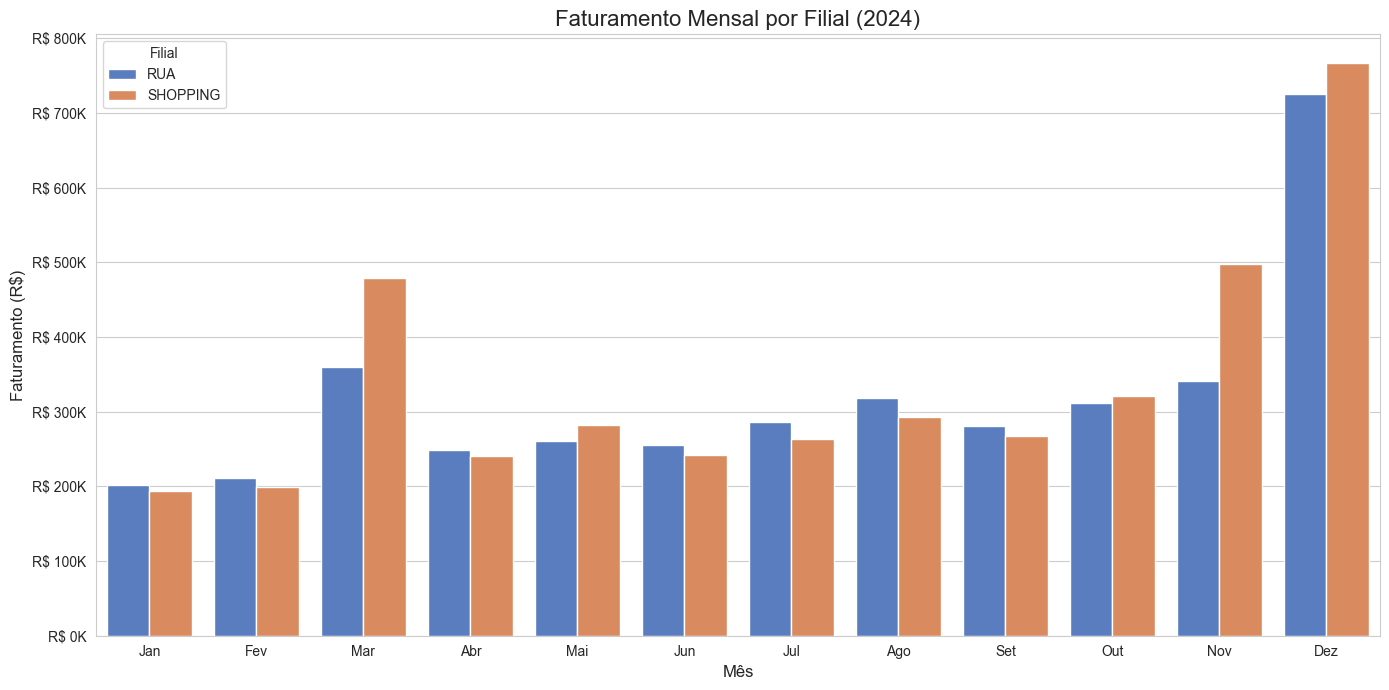


Gráfico salvo com sucesso em: ..\graphics\faturamento_mensal_agrupado.png


In [50]:
vf.plot_faturamento_mensal_filial(vendas)

Será que a diferença do faturamento mensal está diretaamente ligada ao ticket médio de cada loja?

Iniciando plot: Faturamento e Ticket Médio Mensal...


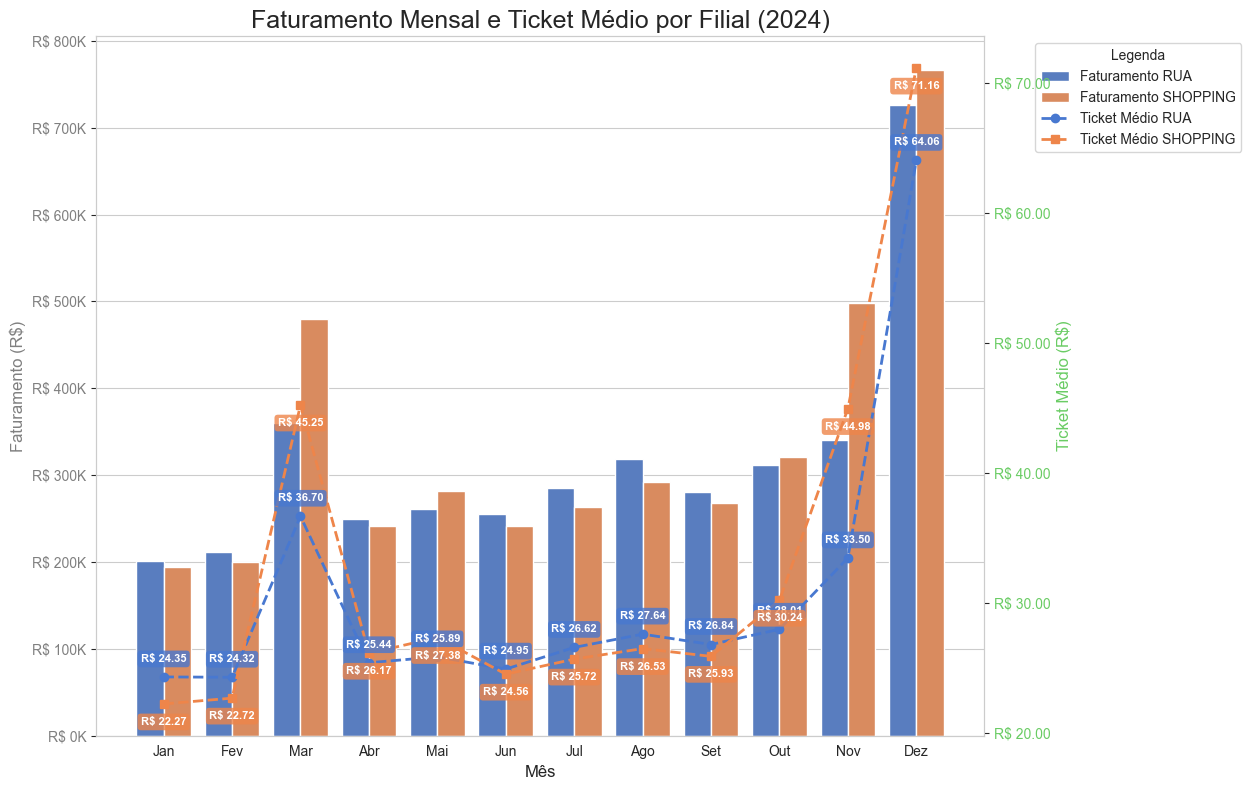


Gráfico salvo com sucesso em: ..\graphics\faturamento_e_ticket_medio_mensal.png


In [51]:
vf.plot_faturamento_e_ticket_medio_mensal(vendas)

Podemos ver no gráfico acima que o faturamento da loja está correlacionado ao ticket médio dela e que o faturameto de março, novembro e dezembro foram os fatores motores para discrepância de faturamento anual entre a loja localizada na rua e a localizada no shopping. Podemos agora ver se nesses meses a loja do shopping recebeu mais clientes únicos do que a da rua

Iniciando plot: Clientes Únicos Mensal por Filial...


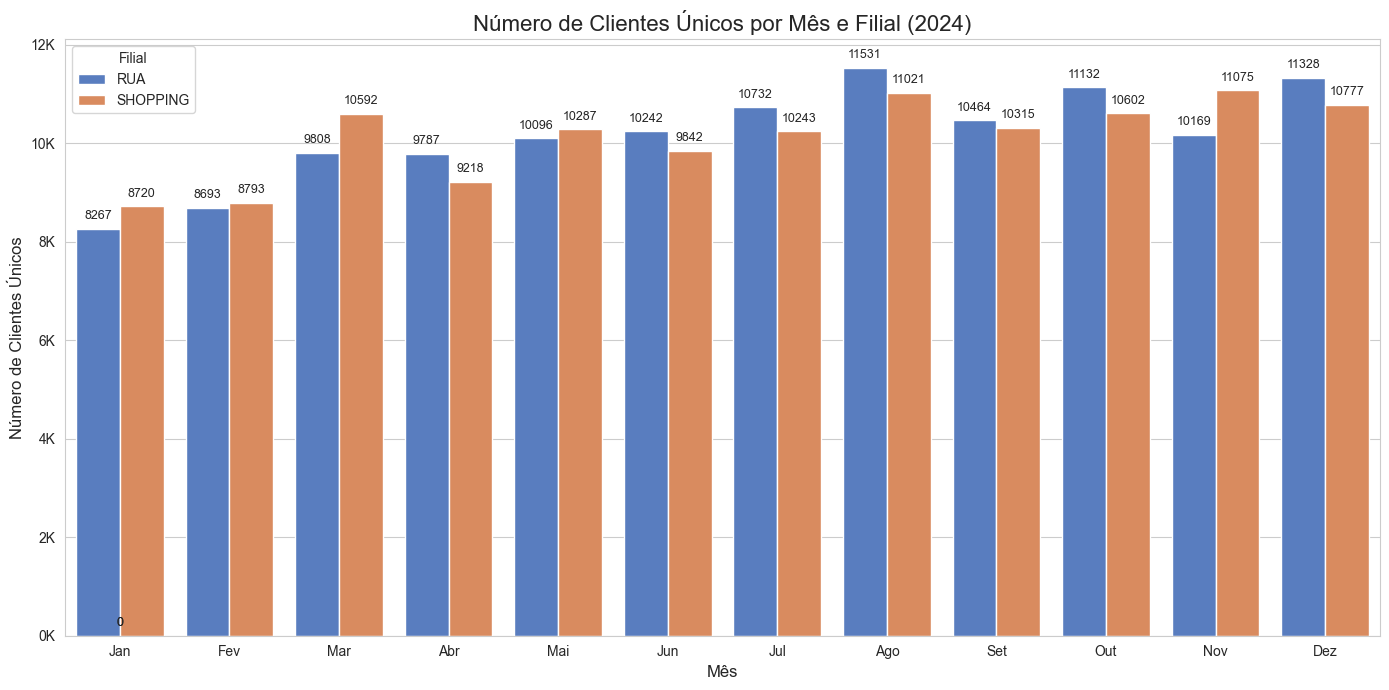


Gráfico salvo com sucesso em: ..\graphics\clientes_unicos_mensal_agrupado.png


In [52]:
vf.plot_clientes_unicos_mensal_filial(vendas)

### 4.3. Análise da qualidade dos dados de cliente

Vamos ver se todas as compras registradas tem o CPF do cliente comprador associado ao produto vendido

In [22]:
nan_count_CPF = vendas['CLI_CPF'].isna().sum()
print(f"Número de valores ausentes na coluna 'CLI_CPF': {nan_count_CPF}")

Número de valores ausentes na coluna 'CLI_CPF': 0


Devido a informação de que todos as vendas da loja incluem a vinculação ao CPF do cliente, podemos extrair informações importantes sobre a persona dos compradores da VAI Store

In [23]:
vendas.head()

,COD_VENDA,COD_FILIAL,FILIAL,DATA_ATEND,SKU,UNID,QTD_VENDA,FATUR_VENDA,CLI_CPF,MES_NUM
COD_ATEND,,,,,,,,,,
000304564.299.0101042.20240102,000304564.299.0101042.20240102.000009.02,101042,SHOPPING,2024-01-02,9,KG,0.258,18.04,ec0abf3f4220,1
000374698.258.0101032.20240102,000374698.258.0101032.20240102.000009.10,101032,RUA,2024-01-02,9,KG,0.064,4.50,83d596ee0acf,1
000383551.256.0101032.20240102,000383551.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.164,11.49,46f63c18e055,1
000383533.256.0101032.20240102,000383533.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.202,14.13,6def1d35e2fe,1
000432095.257.0101032.20240102,000432095.257.0101032.20240102.000051.06,101032,RUA,2024-01-02,51,KG,0.086,6.87,1576e1a36394,1


### 4.4. Análise do faturamento

In [31]:
# Importação das funções de plotagem
import plots_faturamento as pf

In [25]:
import importlib

importlib.reload(pf)

<module 'plots_faturamento' from 'c:\\Users\\felip\\OneDrive\\Documentos\\GitHub\\Grupo6-ProjetoFinal\\src\\plots\\plots_faturamento.py'>

Primeiro, vamos analisar o faturamento total da companhia no ano de 2024.

In [26]:
vendas_2024 = vendas.loc[vendas['DATA_ATEND'].dt.year == 2024]

faturamento = vendas_2024['FATUR_VENDA'].sum()

faturamento_formatado = f"R$ {faturamento:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print(f"Faturamento Total de 2024: {faturamento_formatado}")

Faturamento Total de 2024: R$ 7.848.726,93


Agora, podemos analisar a distribuição desse faturamento pelos meses do ano.

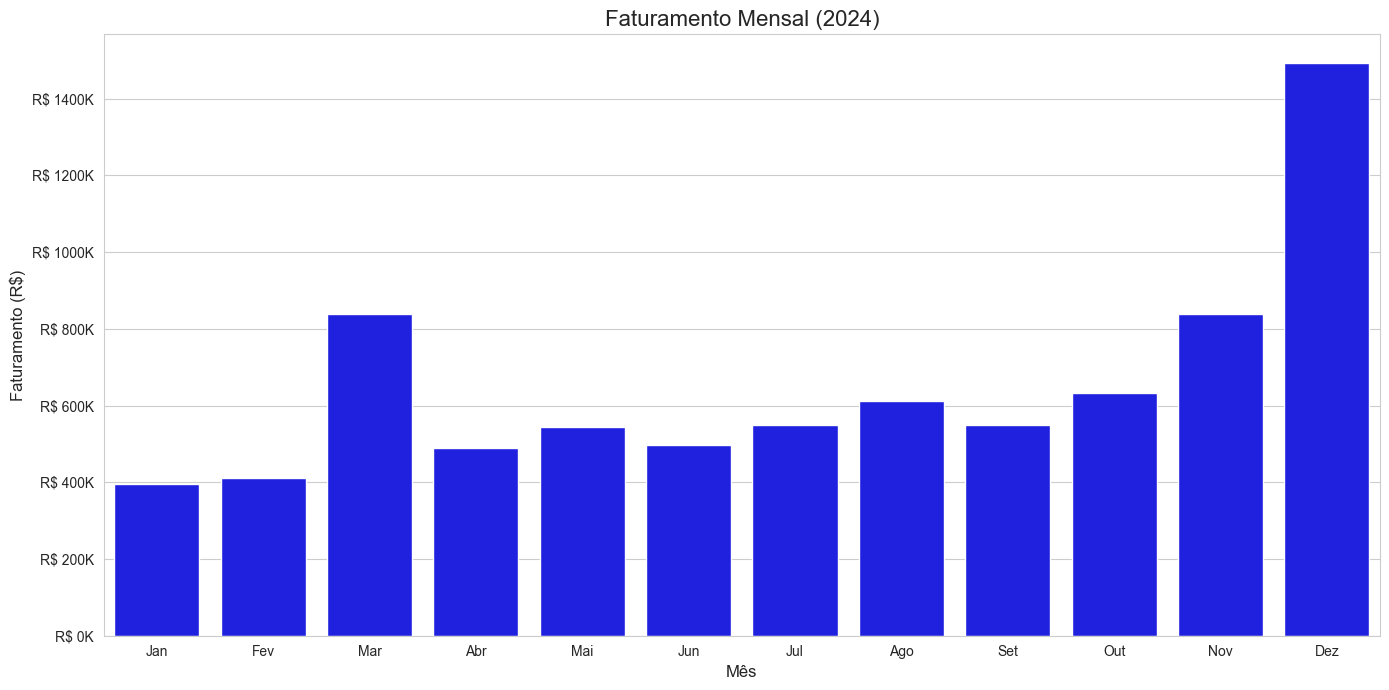

In [30]:
pf.faturamento_mensal(vendas)

A análise do faturamento mensal revela um padrão de **sazonalidade**, com os meses de Março, Novembro e Dezembro se destacando como possíveis __outliers__.